In [87]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
from keras.backend import constant
from keras import optimizers

from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K

m = 1 # dimension of state space
d = 1 # number of layers in strategy
N = 20 # time discretization

price = Input(shape=(m,))
strategy = Input(shape=(m,))
wealth = Input(shape=(1,))
costs = Input(shape=(1,))
inputs = [price, strategy, costs, wealth]
output_state = []
layers = []
for j in range(N):
    for i in range(d):
        layer = Dense(m, activation='tanh',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        layers = layers + [layer]

for j in range(N):
    helper1 = Concatenate()([price,strategy])
    for i in range(d):
        strategyhelper = layers[i+(j)*d](helper1)
    incr = Input(shape=(m,))
    change = Subtract()([strategyhelper,strategy])
    strategy = strategyhelper
    absolutechanges = Lambda(lambda x : K.abs(x))(change)
    costs = Multiply()([absolutechanges,price])
    costs = Lambda(lambda x : -0.01*K.sum(x,axis=1))(costs)
    price = Add()([incr, price])
    mult = Multiply()([strategyhelper, incr])
    mult = Lambda(lambda x : K.sum(x,axis=1))(mult)
    wealth = Add()([mult,wealth])
    wealth = Add()([costs,wealth])
    inputs = inputs + [incr]
    state = wealth
helper = Lambda(lambda x : K.abs(x))(strategy)
costs = Multiply()([helper,price])
costs = Lambda(lambda x : -0.01*K.sum(x,axis=1))(costs)
wealth = Add()([wealth,costs])
state = wealth
model_tradewealth = Model(inputs, outputs=state)

In [88]:
Ktrain = 10**4
initialprice = 1.0
initialwealth = 1.0
xtrain = ([initialprice*np.ones(Ktrain)] +
          [0.0*np.ones((Ktrain,m))]+
          [np.zeros(Ktrain)]+
          [initialwealth*np.ones(Ktrain)]+
          [np.random.normal(0.1/N,0.2/np.sqrt(N),(Ktrain,m)) for i in range(N)])

ytrain=np.zeros((Ktrain,1))

In [89]:
def custom_loss(y_true,y_pred):
    return K.mean(K.exp(-y_pred))

In [90]:
model_tradewealth.compile(optimizer='adam',loss=custom_loss)

Epoch 1/10
10000/10000 [==============================] - 3s - loss: 0.4215     
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3787     
Epoch 3/10
10000/10000 [==============================] - 1s - loss: 0.3658     
Epoch 4/10
10000/10000 [==============================] - 1s - loss: 0.3600     
Epoch 5/10
10000/10000 [==============================] - 1s - loss: 0.3567     
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.3544     
Epoch 7/10
10000/10000 [==============================] - 1s - loss: 0.3528     
Epoch 8/10
10000/10000 [==============================] - 1s - loss: 0.3517     
Epoch 9/10
10000/10000 [==============================] - 1s - loss: 0.3510     
Epoch 10/10
10000/10000 [==============================] - 1s - loss: 0.3503     


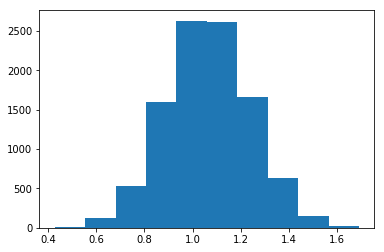

1.0649831
Epoch 1/10
10000/10000 [==============================] - 1s - loss: 0.3498     
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3493     
Epoch 3/10
10000/10000 [==============================] - 1s - loss: 0.3489     
Epoch 4/10
10000/10000 [==============================] - 1s - loss: 0.3484     
Epoch 5/10
10000/10000 [==============================] - 1s - loss: 0.3480     
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.3477     
Epoch 7/10
10000/10000 [==============================] - 1s - loss: 0.3473     
Epoch 8/10
10000/10000 [==============================] - 1s - loss: 0.3471     
Epoch 9/10
10000/10000 [==============================] - 1s - loss: 0.3469     
Epoch 10/10
10000/10000 [==============================] - 1s - loss: 0.3467     


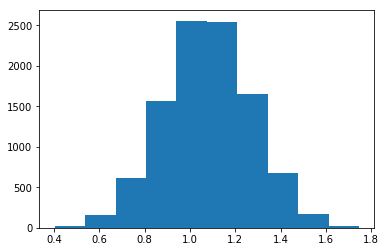

1.0782679
Epoch 1/10
10000/10000 [==============================] - 1s - loss: 0.3466     
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3465     
Epoch 3/10
10000/10000 [==============================] - 1s - loss: 0.3464     
Epoch 4/10
10000/10000 [==============================] - 1s - loss: 0.3464     
Epoch 5/10
10000/10000 [==============================] - 1s - loss: 0.3463     
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.3463     
Epoch 7/10
10000/10000 [==============================] - 1s - loss: 0.3462     
Epoch 8/10
10000/10000 [==============================] - 1s - loss: 0.3462     
Epoch 9/10
10000/10000 [==============================] - 1s - loss: 0.3462     
Epoch 10/10
10000/10000 [==============================] - 1s - loss: 0.3462     


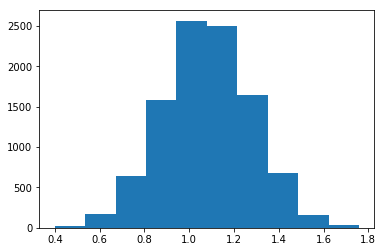

1.0804043
Epoch 1/10
10000/10000 [==============================] - 1s - loss: 0.3462     
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 3/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 4/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 5/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 7/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 8/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 9/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 10/10
10000/10000 [==============================] - 1s - loss: 0.3461     


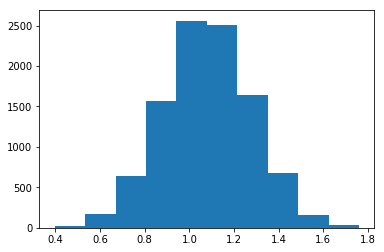

1.0807705
Epoch 1/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 2/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 3/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 4/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 5/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 6/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 7/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 8/10
10000/10000 [==============================] - 1s - loss: 0.3461     
Epoch 9/10
10000/10000 [==============================] - 2s - loss: 0.3461     
Epoch 10/10
10000/10000 [==============================] - 2s - loss: 0.3461     


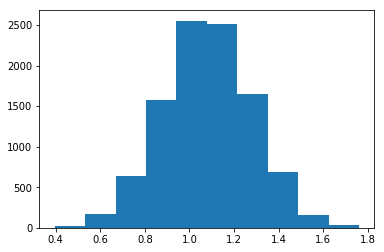

1.0808524


In [91]:
import matplotlib.pyplot as plt

for i in range(5):
    model_tradewealth.fit(x=xtrain,y=ytrain, epochs=10,verbose=True)
    plt.hist(model_tradewealth.predict(xtrain))
    plt.show()
    print(np.mean(model_tradewealth.predict(xtrain)))